If the volume score (position 0) is 10 times (10x) higher than the previous bar's (position -1) then draw a box at the corresponding candlestick (extend +5 bars to the right).

Condition: if the current vol_score (position 0) is 10× higher than the previous vol_score (position -1).
Action: draw a box around the corresponding candlestick and extend it 1 bar to the right.
This uses only the volume score (third pane) as the reference.

C:\Users\User\AppData\Local\Temp\ipykernel_7612\3527964420.py:46: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



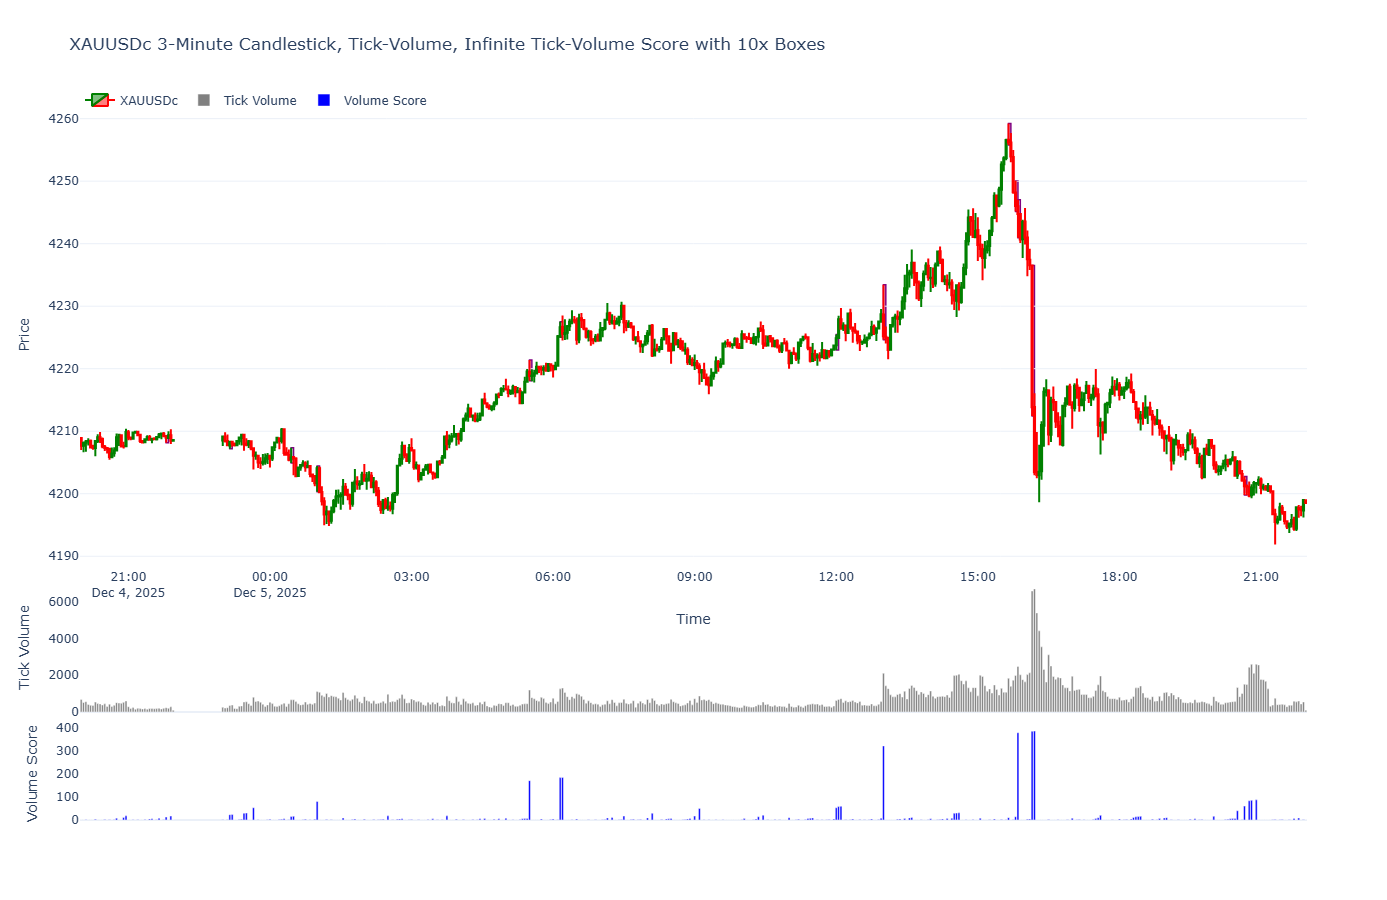

In [3]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods (weekends)
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Infinite tick-volume score algorithm (horizontal intersection logic)
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        # Compare current bar to all previous bars to the left until intersection
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 6. Additional logic: box if vol_score is 10x previous vol_score
# -------------------------
boxes = []
for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+1, len(df)-1)]  # extend 1 bar to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))

# -------------------------
# 7. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes for 10x vol_score spikes
fig.update_layout(shapes=boxes)

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Infinite Tick-Volume Score with 10x Boxes',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()


C:\Users\User\AppData\Local\Temp\ipykernel_7612\118262582.py:45: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



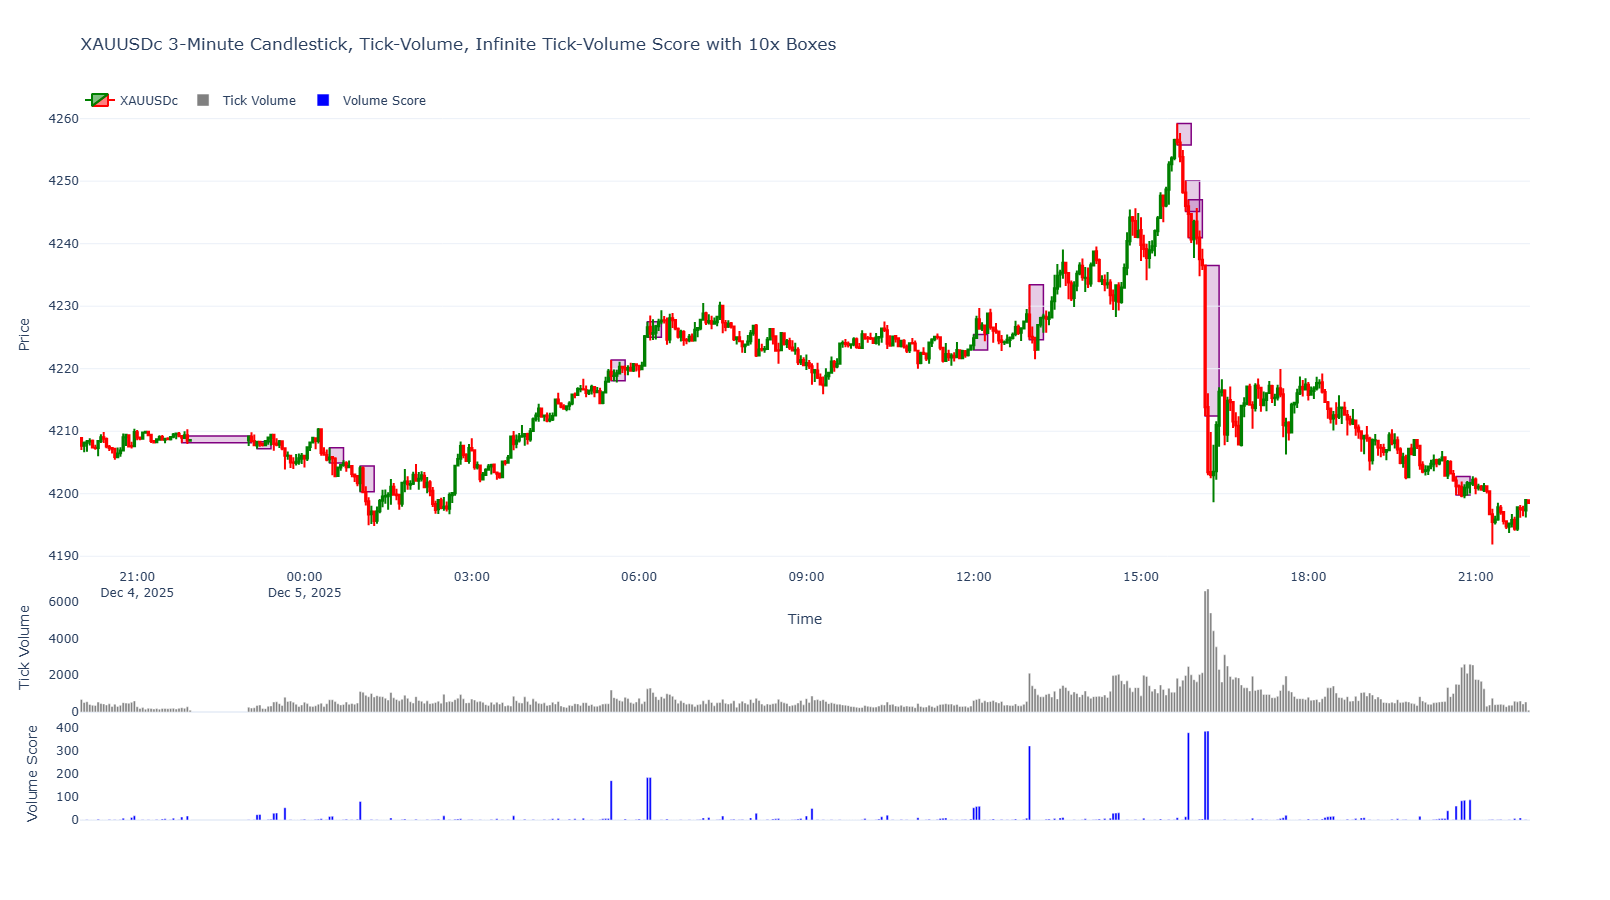

In [11]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods (weekends)
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Infinite tick-volume score algorithm (horizontal intersection logic)
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 6. Additional logic: box if vol_score is 10x previous vol_score
# -------------------------
boxes = []
for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))

# -------------------------
# 7. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes for 10x vol_score spikes
fig.update_layout(shapes=boxes)

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Infinite Tick-Volume Score with 10x Boxes',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()


In [ ]:
plot mark at the closing price of the box

C:\Users\User\AppData\Local\Temp\ipykernel_7612\3840049150.py:45: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



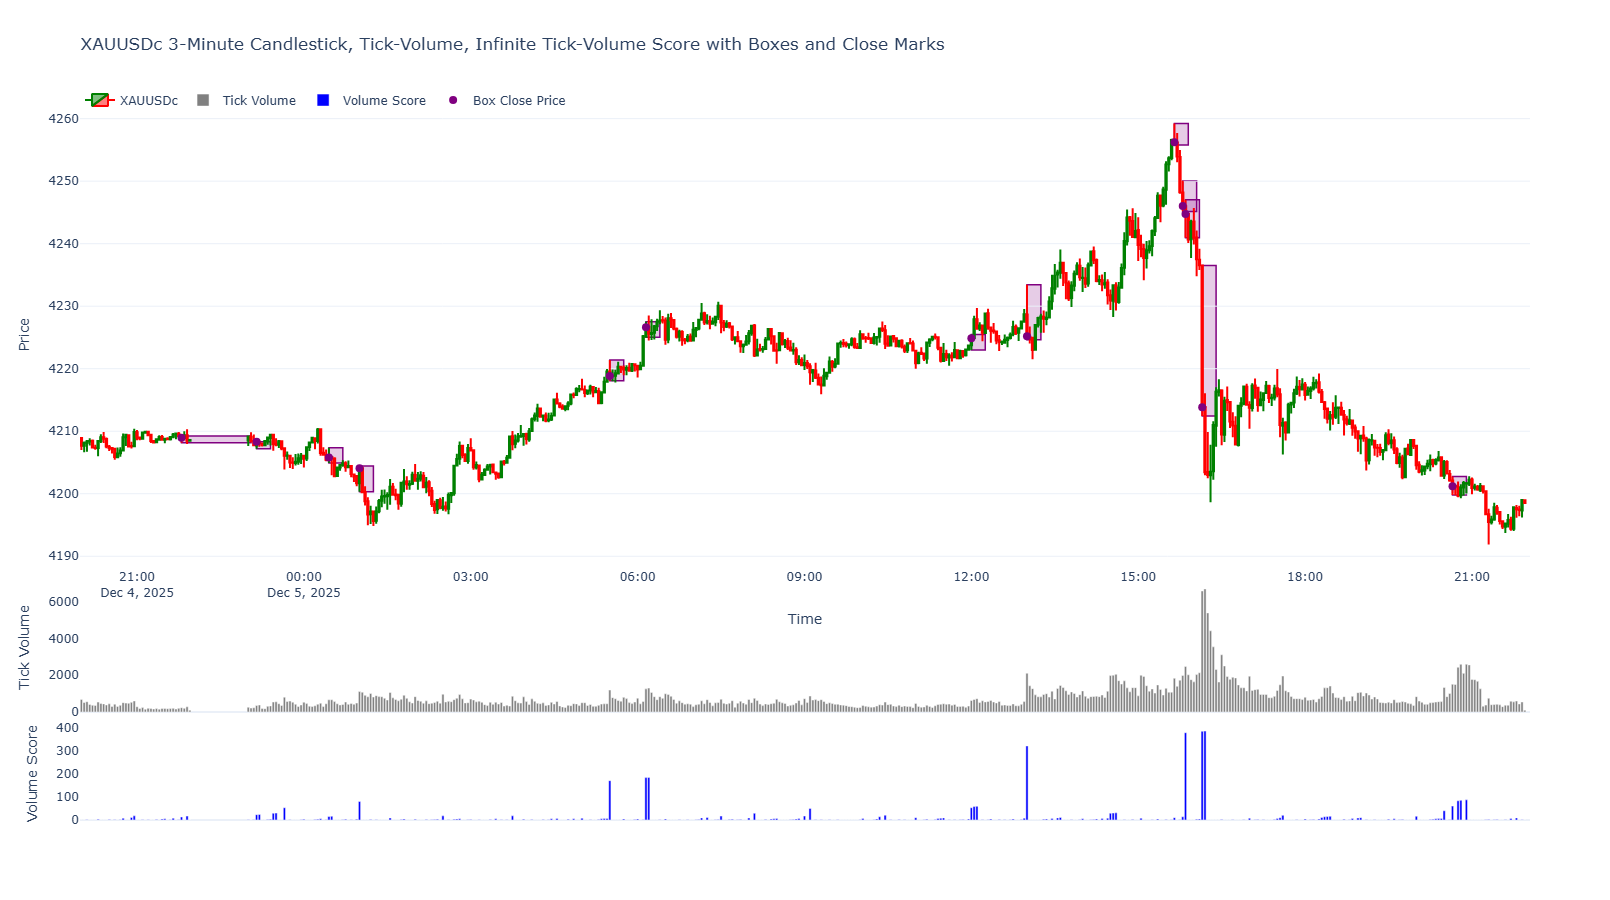

In [12]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -------------------------
# 4. Remove non-trading periods (weekends)
# -------------------------
df = df[df.index.dayofweek < 5]

# -------------------------
# 5. Infinite tick-volume score algorithm (horizontal intersection logic)
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 6. Additional logic: box if vol_score is 10x previous vol_score
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        # Box coordinates
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        # Mark at the closing price of the box
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 7. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes for 10x vol_score spikes
fig.update_layout(shapes=boxes)

# Add marks at the closing price of the boxes
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Infinite Tick-Volume Score with Boxes and Close Marks',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()


make use of this trading strategy logic and backtest: 

    If there's a signal (Box Close Price = true), then sellstop at the close (if the candlestick is bearish) and use 3 price units worth of stoploss price, and buystop at the ‘3 price unit + close price’ price and use 3 price units worth of stoploss price.

Or

    If there’s a signal (Box Close Price = true), then buystop at the close (if the candlestick is bullish) and use 3 price units worth of stoploss price, and sellstop at the ‘3 price unit - close price’ price and use 3 price units worth of stoploss price.
    
The take profit distance will vary at the next signal (Box Close Price = true). 
All orders are only valid until the next signal, take all positions out (filled or unfilled) at the next signal.
Plot the equity curve on another graph, and do not delete the three existing panes.

Trading Strategy Rules:

Signal: Box Close Price = True.

If the candlestick at the signal is bearish (close < open):

Place a SellStop at the close with 3 price units stoploss.
Place a BuyStop at close + 3 price units with 3 price units stoploss.

If the candlestick at the signal is bullish (close > open):

Place a BuyStop at the close with 3 price units stoploss.
Place a SellStop at close - 3 price units with 3 price units stoploss.

Take profit distance: exit at the next signal.

All orders (filled or unfilled) are closed at next signal.


C:\Users\User\AppData\Local\Temp\ipykernel_7612\435528330.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



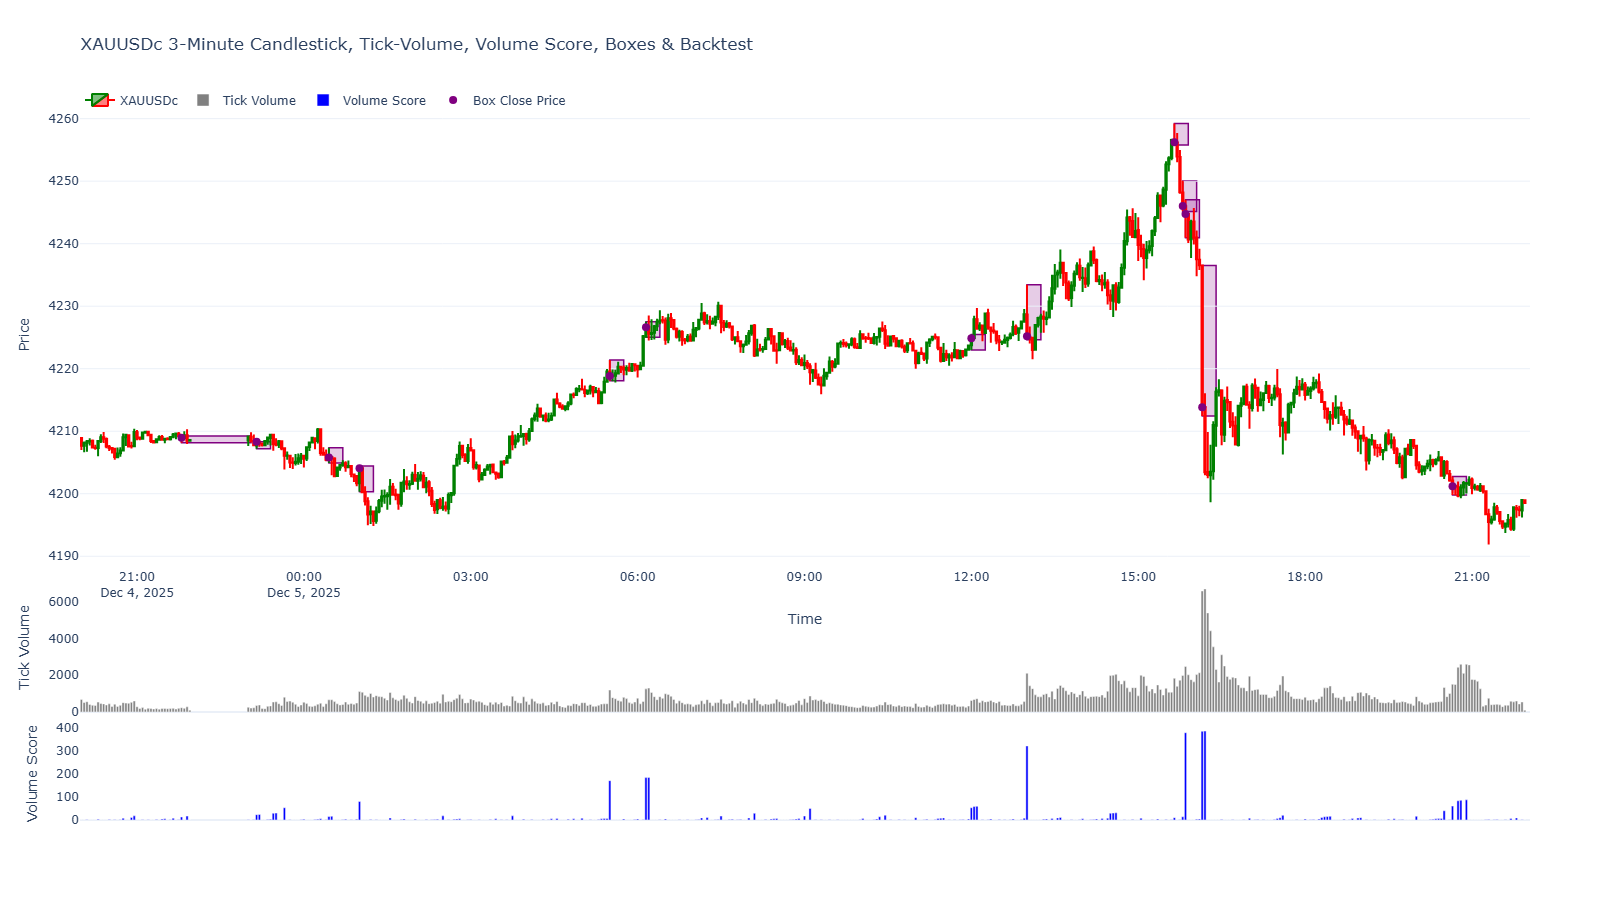

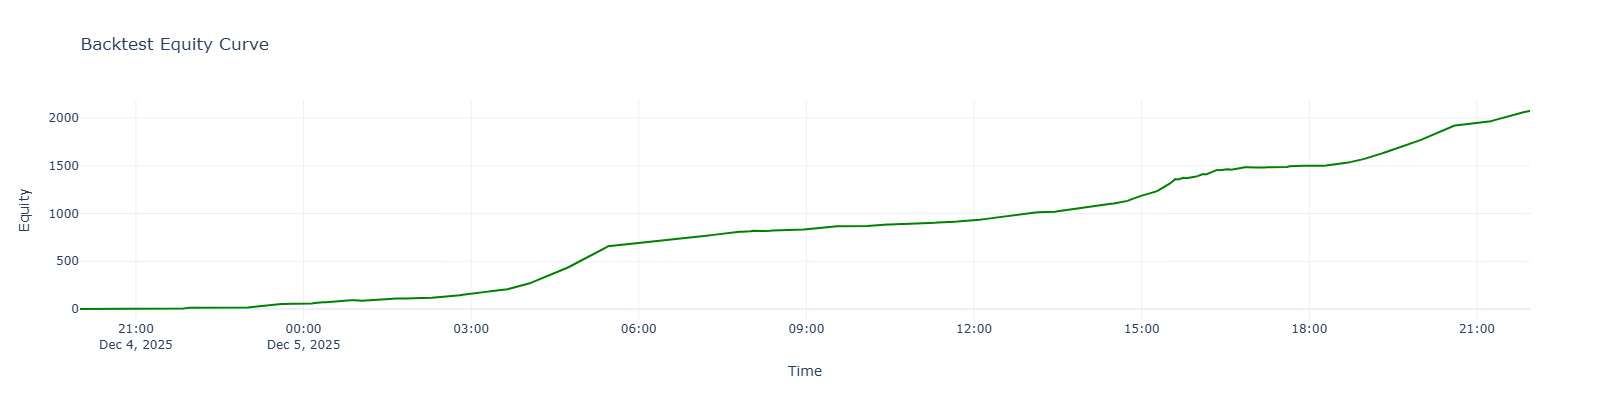

In [13]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[df.index.dayofweek < 5]  # remove weekends

# -------------------------
# 4. Infinite tick-volume score
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 5. Box logic for 10x vol_score spikes
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 6. Backtest strategy
# -------------------------
price_unit = 3  # 3 price units
equity = []
balance = 0

positions = []
last_signal_idx = None

for i in range(len(df)):
    # check if this bar is a signal
    if df.index[i] in box_marks_x:
        close_price = df['close'].iloc[i]
        is_bullish = df['close'].iloc[i] > df['open'].iloc[i]
        # Close all previous positions
        positions = []
        last_signal_idx = i
        # Place new orders
        if is_bullish:
            positions.append({'type':'buystop', 'entry':close_price, 'stop':close_price-3})
            positions.append({'type':'sellstop', 'entry':close_price-3, 'stop':close_price-6})
        else:
            positions.append({'type':'sellstop', 'entry':close_price, 'stop':close_price+3})
            positions.append({'type':'buystop', 'entry':close_price+3, 'stop':close_price+6})
    # Update equity: simple PnL simulation
    if positions:
        pnl = 0
        for pos in positions:
            if pos['type']=='buystop':
                # if current high >= entry, assume filled
                if df['high'].iloc[i] >= pos['entry']:
                    pnl += df['close'].iloc[i] - pos['entry']
                # assume stoploss hit if low <= stop
                if df['low'].iloc[i] <= pos['stop']:
                    pnl += pos['stop'] - pos['entry']
            elif pos['type']=='sellstop':
                if df['low'].iloc[i] <= pos['entry']:
                    pnl += pos['entry'] - df['close'].iloc[i]
                if df['high'].iloc[i] >= pos['stop']:
                    pnl += pos['entry'] - pos['stop']
        balance += pnl
    equity.append(balance)

df['equity'] = equity

# -------------------------
# 7. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes for 10x vol_score spikes
fig.update_layout(shapes=boxes)

# Add marks at the closing price of the boxes
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Volume Score, Boxes & Backtest',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()

# -------------------------
# 8. Plot Equity Curve separately
# -------------------------
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df.index,
    y=df['equity'],
    mode='lines',
    name='Equity Curve',
    line=dict(color='green', width=2)
))
fig2.update_layout(
    template='plotly_white',
    title='Backtest Equity Curve',
    xaxis_title='Time',
    yaxis_title='Equity',
    height=400
)
fig2.show()


C:\Users\User\AppData\Local\Temp\ipykernel_7612\2602253576.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



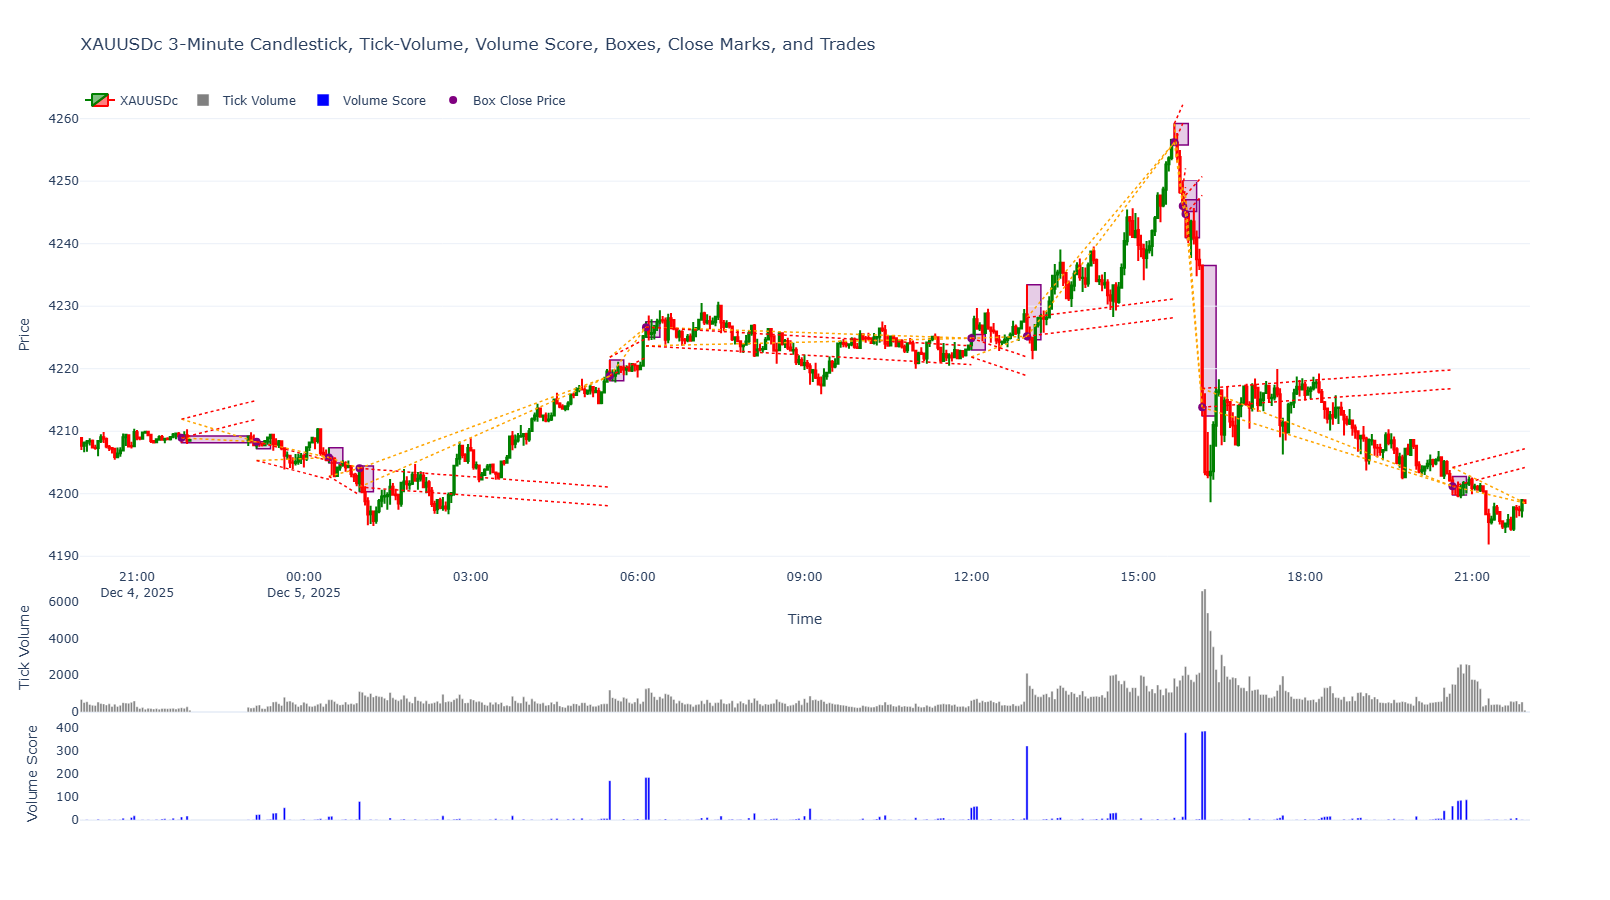

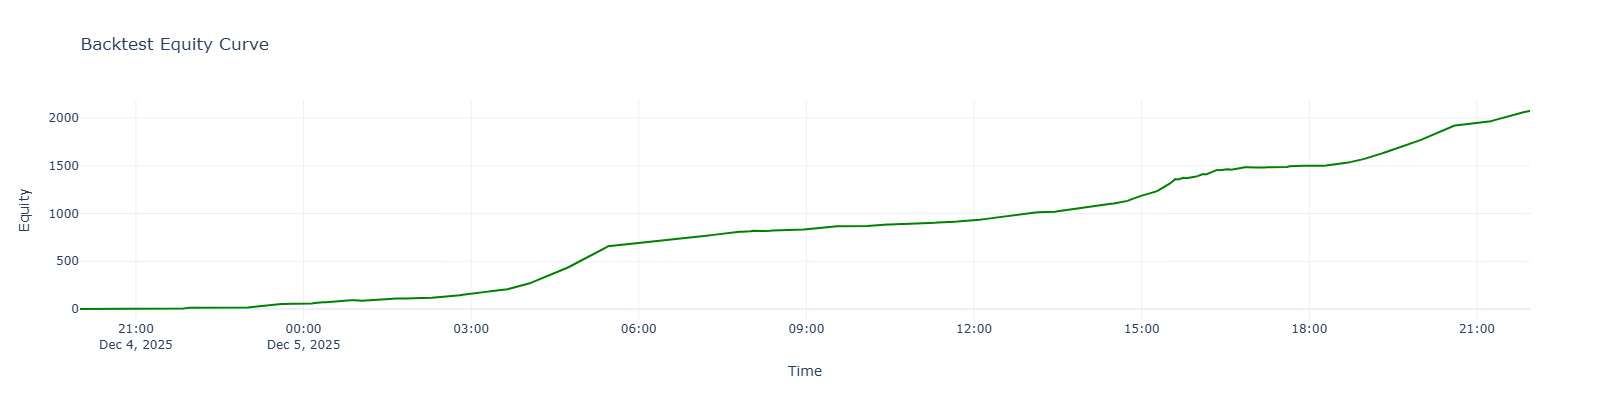

In [14]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[df.index.dayofweek < 5]  # remove weekends

# -------------------------
# 4. Infinite tick-volume score
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 5. Box logic for 10x vol_score spikes
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 6. Backtest strategy with trade lines
# -------------------------
price_unit = 3  # 3 price units
equity = []
balance = 0
trade_lines = []

positions = []
last_signal_idx = None

for i in range(len(df)):
    # check if this bar is a signal
    if df.index[i] in box_marks_x:
        close_price = df['close'].iloc[i]
        is_bullish = df['close'].iloc[i] > df['open'].iloc[i]

        # Close all previous positions
        positions = []
        last_signal_idx = i

        # Determine take profit as next signal or last bar
        next_signal_idx = min([j for j, t in enumerate(df.index) if t in box_marks_x and j > i] + [len(df)-1])
        tp_price = df['close'].iloc[next_signal_idx]

        # Place new orders
        if is_bullish:
            positions.append({'type':'buystop', 'entry':close_price, 'stop':close_price-3, 'tp':tp_price})
            positions.append({'type':'sellstop', 'entry':close_price-3, 'stop':close_price-6, 'tp':tp_price})
        else:
            positions.append({'type':'sellstop', 'entry':close_price, 'stop':close_price+3, 'tp':tp_price})
            positions.append({'type':'buystop', 'entry':close_price+3, 'stop':close_price+6, 'tp':tp_price})

        # Add trade lines for visualization
        for pos in positions:
            if pos['type'] in ['buystop', 'sellstop']:
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[i],
                    x1=df.index[next_signal_idx],
                    y0=pos['entry'],
                    y1=pos['tp'],
                    line=dict(color='orange', width=1.5, dash='dot'),
                    layer="above"
                ))
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[i],
                    x1=df.index[next_signal_idx],
                    y0=pos['entry'],
                    y1=pos['stop'],
                    line=dict(color='red', width=1.5, dash='dot'),
                    layer="above"
                ))

    # Update equity: simple PnL simulation
    if positions:
        pnl = 0
        for pos in positions:
            if pos['type']=='buystop':
                if df['high'].iloc[i] >= pos['entry']:
                    pnl += df['close'].iloc[i] - pos['entry']
                if df['low'].iloc[i] <= pos['stop']:
                    pnl += pos['stop'] - pos['entry']
            elif pos['type']=='sellstop':
                if df['low'].iloc[i] <= pos['entry']:
                    pnl += pos['entry'] - df['close'].iloc[i]
                if df['high'].iloc[i] >= pos['stop']:
                    pnl += pos['entry'] - pos['stop']
        balance += pnl
    equity.append(balance)

df['equity'] = equity

# -------------------------
# 7. Plot 3-pane chart with boxes, marks, and trade lines
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes
fig.update_layout(shapes=boxes + trade_lines)

# Add marks at box closing price
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Volume Score, Boxes, Close Marks, and Trades',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()

# -------------------------
# 8. Plot Equity Curve separately
# -------------------------
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df.index,
    y=df['equity'],
    mode='lines',
    name='Equity Curve',
    line=dict(color='green', width=2)
))
fig2.update_layout(
    template='plotly_white',
    title='Backtest Equity Curve',
    xaxis_title='Time',
    yaxis_title='Equity',
    height=400
)
fig2.show()


Key Improvements for Realistic Execution:

Pending Orders:

BuyStop executes only if high >= entry.

SellStop executes only if low <= entry.

Stoploss:

If after execution, the price touches stoploss (low <= stop for buy, high >= stop for sell), the trade closes at stop.

Take Profit / Exit at Next Signal:

The trade closes at next signal close price if the stoploss wasn’t hit first.

One trade at a time per signal:

After a signal, no other trades until next signal.

Trade PnL:

PnL calculated using executed price rather than just current bar close.

Draw trade lines dynamically:

Line from entry → stop or entry → exit.

C:\Users\User\AppData\Local\Temp\ipykernel_7612\4079826888.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



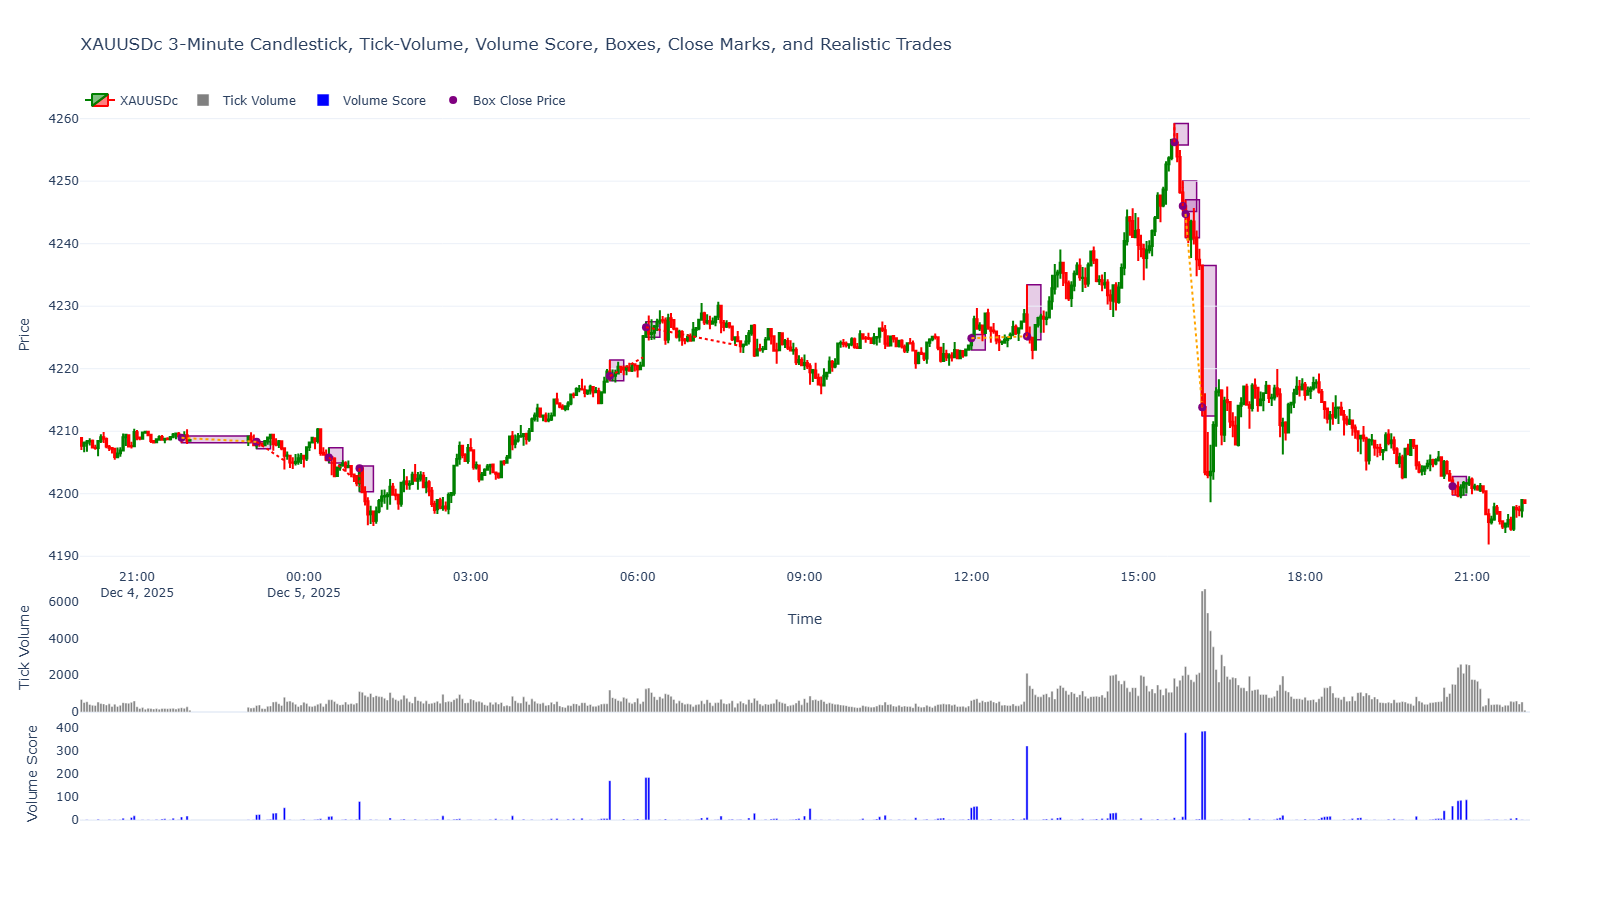

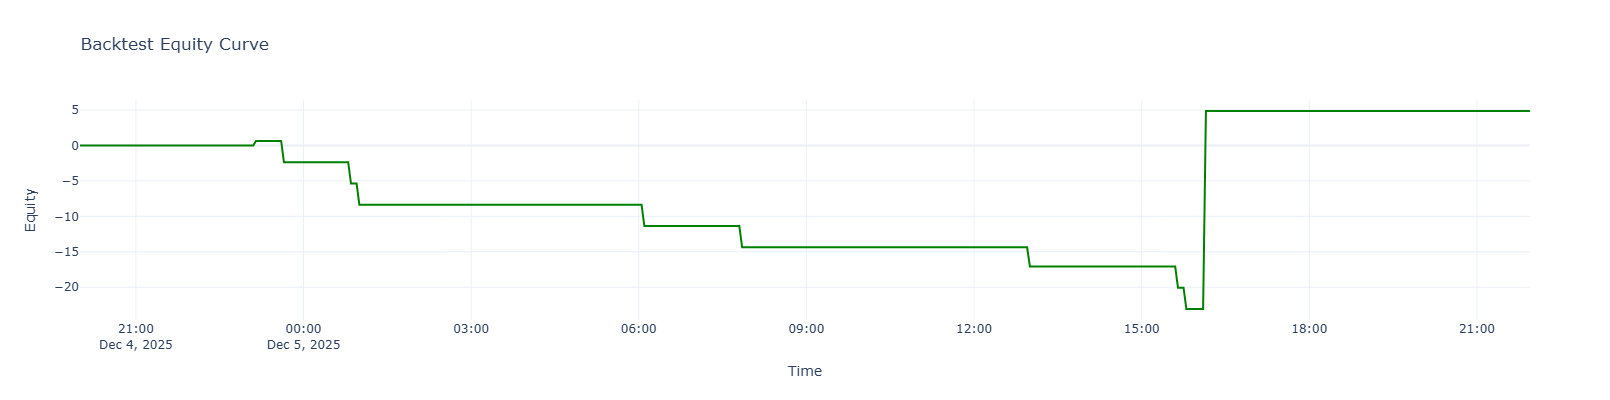

In [15]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[df.index.dayofweek < 5]  # remove weekends

# -------------------------
# 4. Infinite tick-volume score
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 5. Box logic for 10x vol_score spikes
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 6. Backtest with realistic trade execution
# -------------------------
price_unit = 3
equity = []
balance = 0
trade_lines = []

active_trade = None  # only one trade at a time
entry_idx = None

for i in range(len(df)):
    # Check for signal
    if df.index[i] in box_marks_x:
        close_price = df['close'].iloc[i]
        is_bullish = close_price > df['open'].iloc[i]

        # Close previous trade at signal
        if active_trade:
            # Exit at next signal close
            exit_price = close_price
            if active_trade['type'] == 'buy':
                pnl = exit_price - active_trade['entry']
            else:
                pnl = active_trade['entry'] - exit_price
            balance += pnl
            # Draw line from entry to exit
            trade_lines.append(dict(
                type="line",
                xref="x",
                yref="y",
                x0=df.index[entry_idx],
                x1=df.index[i],
                y0=active_trade['entry'],
                y1=exit_price,
                line=dict(color='orange', width=2, dash='dot'),
                layer="above"
            ))
            active_trade = None

        # Place new trade
        entry_idx = i
        if is_bullish:
            active_trade = {
                'type': 'buy',
                'entry': close_price,
                'stop': close_price - price_unit
            }
        else:
            active_trade = {
                'type': 'sell',
                'entry': close_price,
                'stop': close_price + price_unit
            }

    # Trade execution simulation
    if active_trade:
        # Check stoploss
        if active_trade['type'] == 'buy':
            if df['low'].iloc[i] <= active_trade['stop']:
                pnl = active_trade['stop'] - active_trade['entry']
                balance += pnl
                # Draw stop line
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[entry_idx],
                    x1=df.index[i],
                    y0=active_trade['entry'],
                    y1=active_trade['stop'],
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                active_trade = None
        elif active_trade['type'] == 'sell':
            if df['high'].iloc[i] >= active_trade['stop']:
                pnl = active_trade['entry'] - active_trade['stop']
                balance += pnl
                # Draw stop line
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[entry_idx],
                    x1=df.index[i],
                    y0=active_trade['entry'],
                    y1=active_trade['stop'],
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                active_trade = None

    equity.append(balance)

df['equity'] = equity

# -------------------------
# 7. Plot 3-pane chart with boxes, marks, and trade lines
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes + trade lines
fig.update_layout(shapes=boxes + trade_lines)

# Add marks at box closing price
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Volume Score, Boxes, Close Marks, and Realistic Trades',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()

# -------------------------
# 8. Plot Equity Curve separately
# -------------------------
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df.index,
    y=df['equity'],
    mode='lines',
    name='Equity Curve',
    line=dict(color='green', width=2)
))
fig2.update_layout(
    template='plotly_white',
    title='Backtest Equity Curve',
    xaxis_title='Time',
    yaxis_title='Equity',
    height=400
)
fig2.show()


Key Execution Rules Applied:

Signal Detection: Box Close Price = True.

Order Placement:

If signal bar is bullish:

BuyStop at close with stoploss 3 units below.

SellStop at close minus 3 units with stoploss 3 units above.

If signal bar is bearish:

SellStop at close with stoploss 3 units above.

BuyStop at close plus 3 units with stoploss 3 units below.

Execution Simulation:

Pending orders only execute if price reaches entry within the bar.

Stoploss triggers if price touches stop level.

Take profit = next signal close price.

Trade Lifecycle:

Only one set of orders per signal.

All positions are closed at the next signal, whether filled or not.

Equity Calculation:

Tracks cumulative profit/loss realistically.

C:\Users\User\AppData\Local\Temp\ipykernel_7612\522150593.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



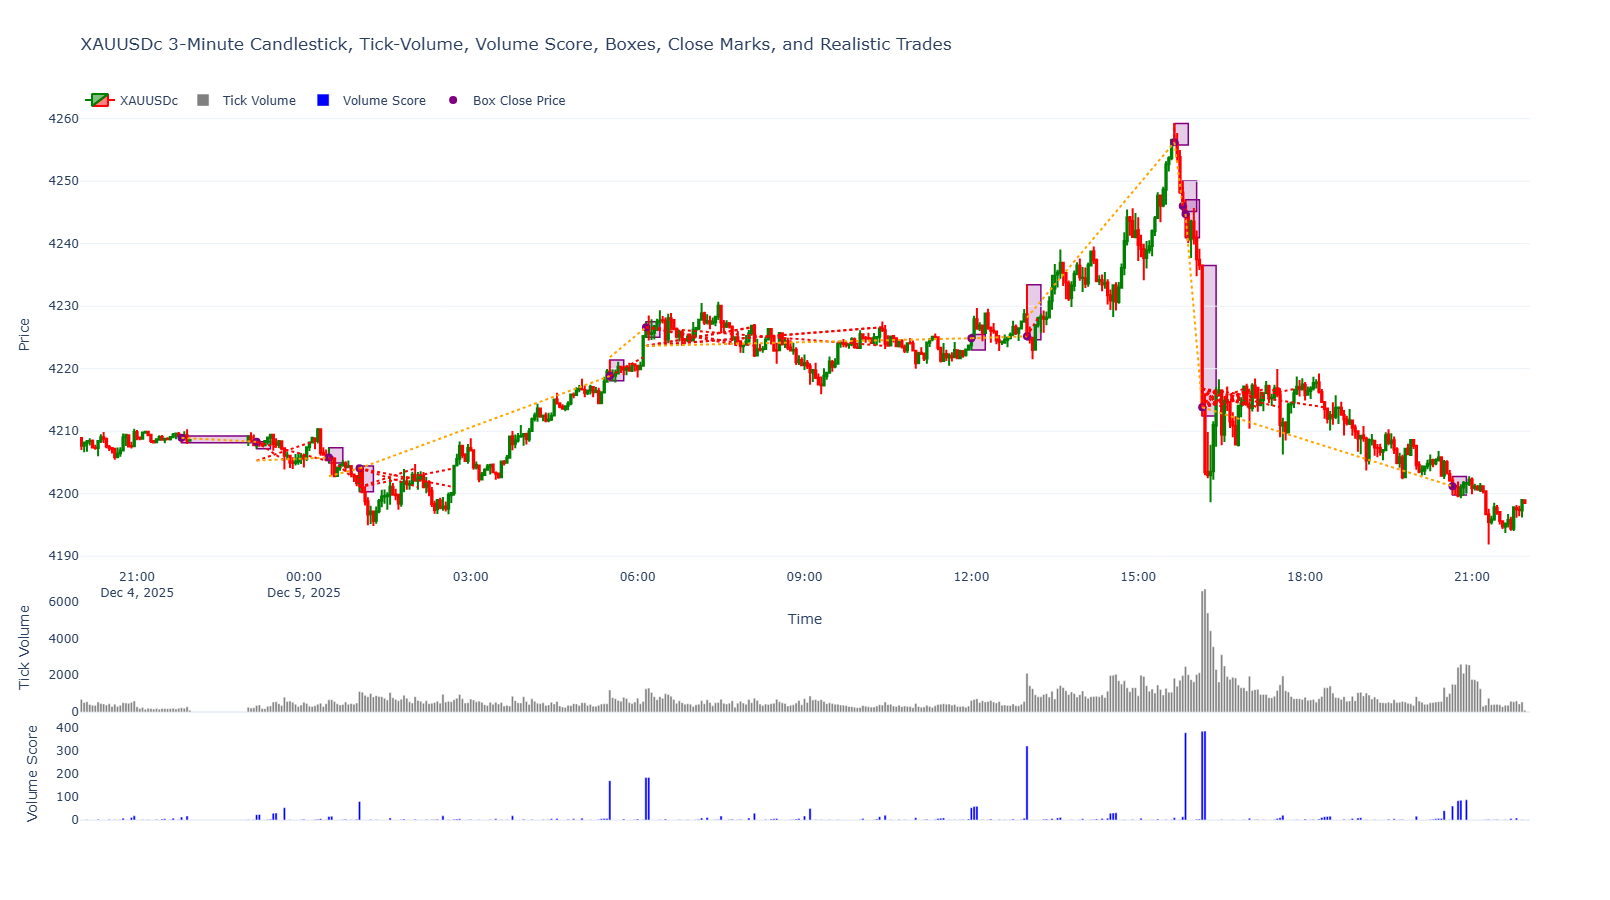

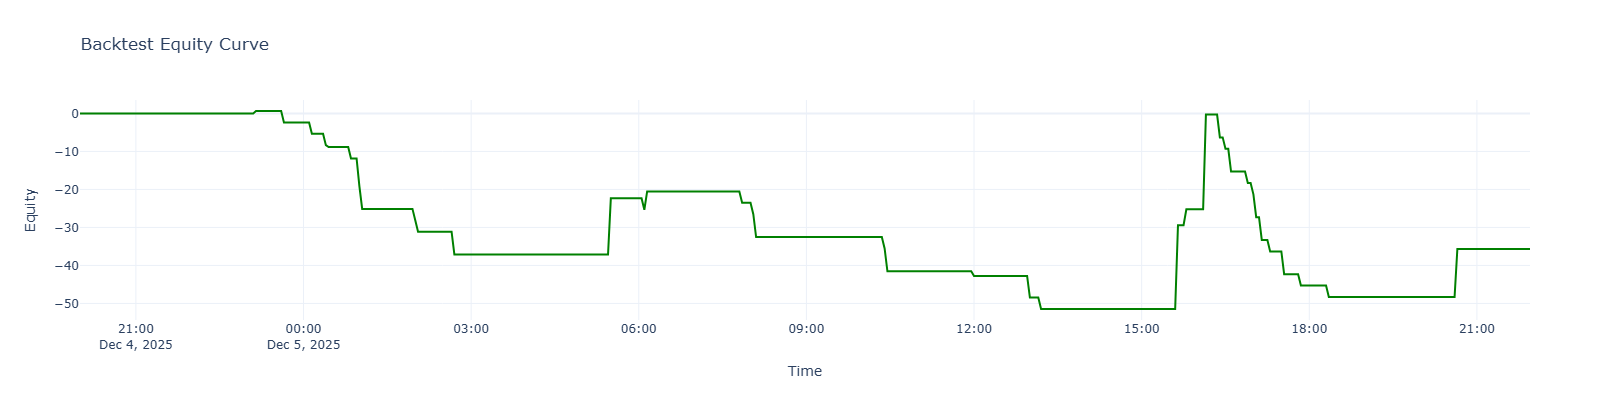

In [17]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[df.index.dayofweek < 5]  # remove weekends

# -------------------------
# 4. Infinite tick-volume score
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 5. Box logic for 10x vol_score spikes
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 6. Realistic backtest for strategy
# -------------------------
price_unit = 3
equity = []
balance = 0
trade_lines = []

active_orders = []  # Pending orders for current signal
entry_idx = None

for i in range(len(df)):
    # Check if this bar is a signal
    if df.index[i] in box_marks_x:
        close_price = df['close'].iloc[i]
        is_bullish = close_price > df['open'].iloc[i]

        # Close all existing positions at this signal
        for order in active_orders:
            if order['filled']:
                # Exit at signal close price
                pnl = 0
                if order['type'] == 'buy':
                    pnl = close_price - order['entry']
                elif order['type'] == 'sell':
                    pnl = order['entry'] - close_price
                balance += pnl
                # Draw line from entry → exit
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[order['entry_idx']],
                    x1=df.index[i],
                    y0=order['entry'],
                    y1=close_price,
                    line=dict(color='orange', width=2, dash='dot'),
                    layer="above"
                ))
        # Reset orders
        active_orders = []

        # Place new pending orders based on signal
        entry_idx = i
        if is_bullish:
            active_orders.append({'type':'buy', 'entry':close_price, 'stop':close_price-price_unit, 'filled':False, 'entry_idx':i})
            active_orders.append({'type':'sell', 'entry':close_price-price_unit, 'stop':close_price, 'filled':False, 'entry_idx':i})
        else:
            active_orders.append({'type':'sell', 'entry':close_price, 'stop':close_price+price_unit, 'filled':False, 'entry_idx':i})
            active_orders.append({'type':'buy', 'entry':close_price+price_unit, 'stop':close_price, 'filled':False, 'entry_idx':i})

    # Check active orders for execution
    for order in active_orders:
        if not order['filled']:
            if order['type'] == 'buy' and df['high'].iloc[i] >= order['entry']:
                order['filled'] = True
            elif order['type'] == 'sell' and df['low'].iloc[i] <= order['entry']:
                order['filled'] = True

        # Check stoploss after filled
        if order['filled']:
            if order['type'] == 'buy' and df['low'].iloc[i] <= order['stop']:
                pnl = order['stop'] - order['entry']
                balance += pnl
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[order['entry_idx']],
                    x1=df.index[i],
                    y0=order['entry'],
                    y1=order['stop'],
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                order['filled'] = False  # Close trade
            elif order['type'] == 'sell' and df['high'].iloc[i] >= order['stop']:
                pnl = order['entry'] - order['stop']
                balance += pnl
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[order['entry_idx']],
                    x1=df.index[i],
                    y0=order['entry'],
                    y1=order['stop'],
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                order['filled'] = False

    equity.append(balance)

df['equity'] = equity

# -------------------------
# 7. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes + trade lines
fig.update_layout(shapes=boxes + trade_lines)

# Add marks at box closing price
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Volume Score, Boxes, Close Marks, and Realistic Trades',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()

# -------------------------
# 8. Plot Equity Curve
# -------------------------
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df.index,
    y=df['equity'],
    mode='lines',
    name='Equity Curve',
    line=dict(color='green', width=2)
))
fig2.update_layout(
    template='plotly_white',
    title='Backtest Equity Curve',
    xaxis_title='Time',
    yaxis_title='Equity',
    height=400
)
fig2.show()


make use of this trading strategy logic and backtest: 

    If there's a signal (Box Close Price = true), then sellstop at the close (if the candlestick is bearish) and use 3 price units worth of stoploss price, and buystop at the ‘3 price unit + close price’ price and use 3 price units worth of stoploss price.

Or

    If there’s a signal (Box Close Price = true), then buystop at the close (if the candlestick is bullish) and use 3 price units worth of stoploss price, and sellstop at the ‘3 price unit - close price’ price and use 3 price units worth of stoploss price.

The take profit distance will vary at the next signal (Box Close Price = true). 

All orders are only valid until the next signal, take all positions out (filled or unfilled) at the next signal.

Only one buystop and one sellstop at corresponding signal (Box Close Price = true).

Plot the equity curve on another graph, and do not delete the three existing panes.

Use a green colored breakline from entry to tarkeprofit.
Use a red colored breakline from entry to stoploss.


C:\Users\User\AppData\Local\Temp\ipykernel_7612\1624423734.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



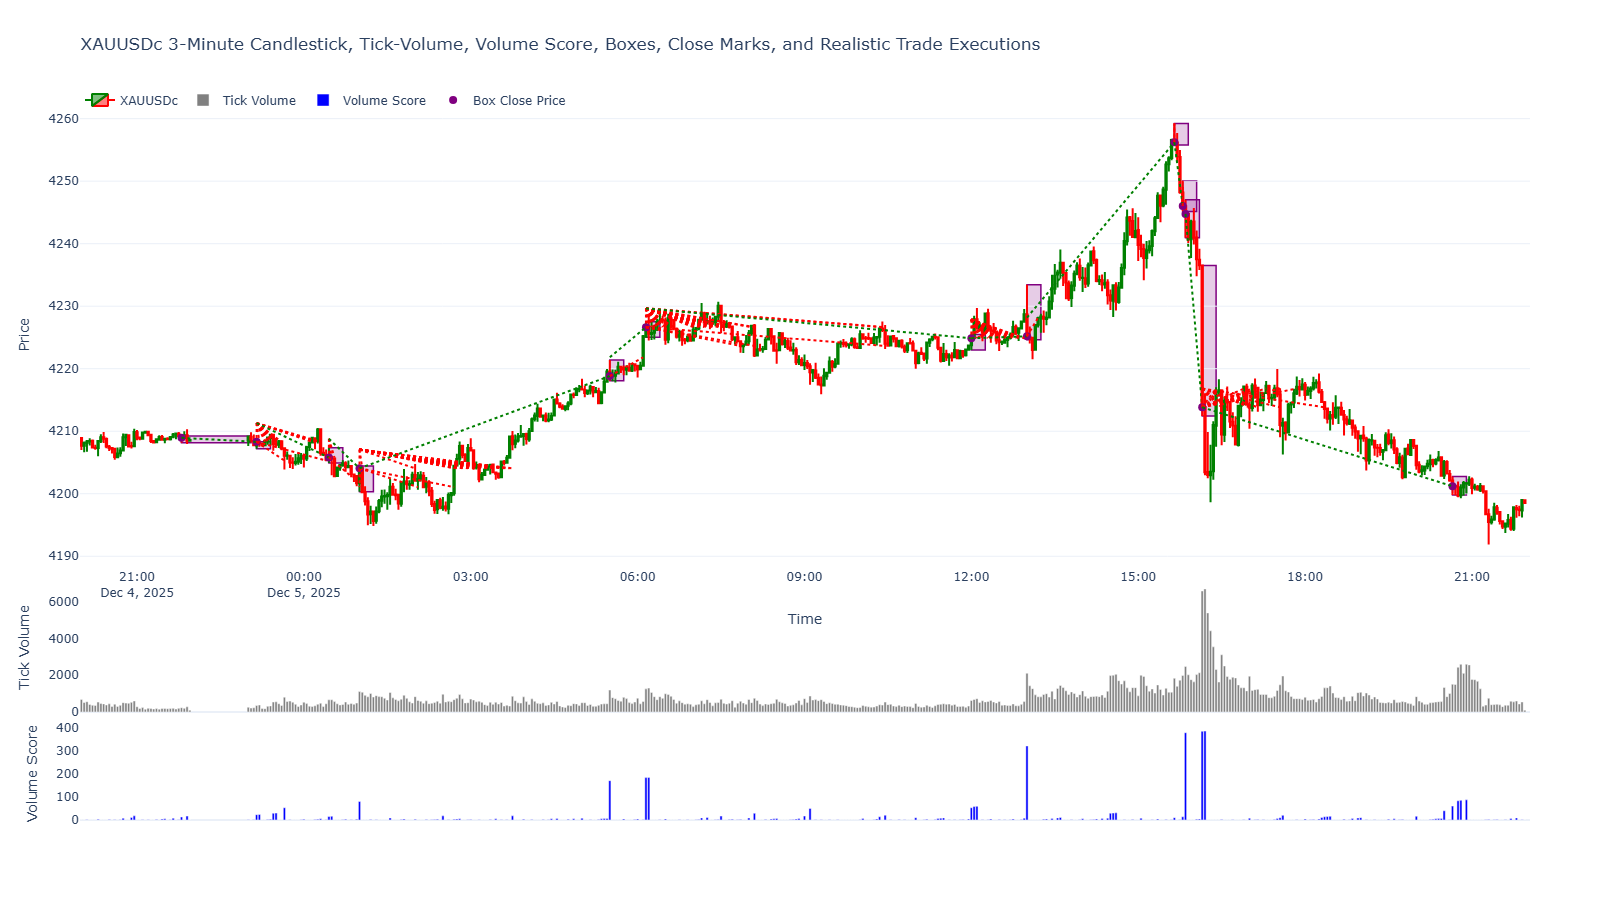

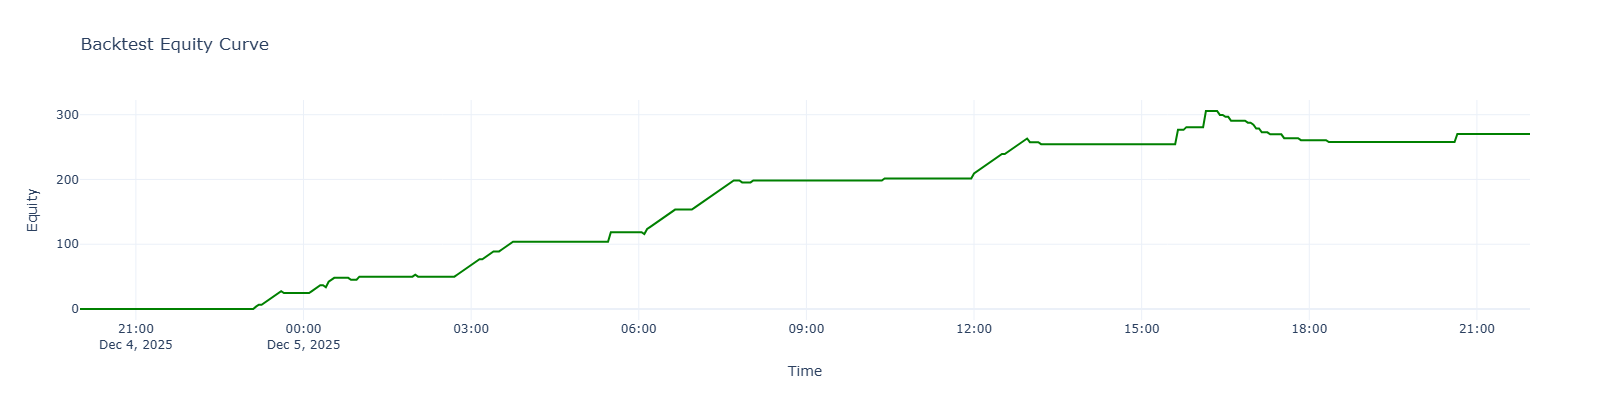

In [18]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[df.index.dayofweek < 5]  # remove weekends

# -------------------------
# 4. Infinite tick-volume score
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 5. Box logic for 10x vol_score spikes
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 6. Backtest realistic order execution
# -------------------------
price_unit = 3
equity = []
balance = 0
trade_lines = []

active_orders = []  # holds up to 2 orders per signal (BuyStop & SellStop)
entry_idx = None
next_signal_idx = None

# Map each box index for next-signal TP reference
box_indices = [df.index.get_loc(x) for x in box_marks_x]

for i in range(len(df)):
    # Check if next signal
    if i in box_indices:
        # Close all active orders at signal close price
        close_price = df['close'].iloc[i]
        exit_idx = i
        new_orders = []

        # Close existing orders
        for order in active_orders:
            if order['executed']:
                # Determine PnL
                if order['type'] == 'buy':
                    pnl = close_price - order['entry']
                else:
                    pnl = order['entry'] - close_price
                balance += pnl
                # Draw line from entry → exit
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[order['entry_idx']],
                    x1=df.index[exit_idx],
                    y0=order['entry'],
                    y1=close_price,
                    line=dict(color='green', width=2, dash='dot'),
                    layer="above"
                ))
        active_orders = []

        # Place new orders (1 BuyStop, 1 SellStop)
        entry_price = df['close'].iloc[i]
        is_bullish = df['close'].iloc[i] > df['open'].iloc[i]

        if is_bullish:
            # BuyStop at close, Stoploss = close - 3
            new_orders.append({'type':'buy','entry':entry_price,'stop':entry_price-price_unit,'executed':False,'entry_idx':i})
            # SellStop at close + 3, Stoploss = close
            new_orders.append({'type':'sell','entry':entry_price+price_unit,'stop':entry_price+price_unit-price_unit,'executed':False,'entry_idx':i})
        else:
            # SellStop at close, Stoploss = close + 3
            new_orders.append({'type':'sell','entry':entry_price,'stop':entry_price+price_unit,'executed':False,'entry_idx':i})
            # BuyStop at close + 3, Stoploss = close
            new_orders.append({'type':'buy','entry':entry_price+price_unit,'stop':entry_price,'executed':False,'entry_idx':i})

        active_orders = new_orders

    # Check execution per bar
    for order in active_orders:
        if not order['executed']:
            if order['type']=='buy' and df['high'].iloc[i] >= order['entry']:
                order['executed'] = True
            elif order['type']=='sell' and df['low'].iloc[i] <= order['entry']:
                order['executed'] = True

        # Check stoploss after execution
        if order['executed']:
            if order['type']=='buy' and df['low'].iloc[i] <= order['stop']:
                pnl = order['stop'] - order['entry']
                balance += pnl
                # Draw stop line
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[order['entry_idx']],
                    x1=df.index[i],
                    y0=order['entry'],
                    y1=order['stop'],
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                order['executed'] = False  # trade closed
            elif order['type']=='sell' and df['high'].iloc[i] >= order['stop']:
                pnl = order['entry'] - order['stop']
                balance += pnl
                # Draw stop line
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[order['entry_idx']],
                    x1=df.index[i],
                    y0=order['entry'],
                    y1=order['stop'],
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                order['executed'] = False  # trade closed

    equity.append(balance)

df['equity'] = equity

# -------------------------
# 7. Plot 3-pane chart with boxes, marks, and trade lines
# -------------------------
fig = go.Figure()

# Candlestick chart (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars (middle pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars (bottom pane)
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes + trade lines
fig.update_layout(shapes=boxes + trade_lines)

# Add marks at box closing price
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Volume Score, Boxes, Close Marks, and Realistic Trade Executions',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()

# -------------------------
# 8. Plot Equity Curve separately
# -------------------------
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df.index,
    y=df['equity'],
    mode='lines',
    name='Equity Curve',
    line=dict(color='green', width=2)
))
fig2.update_layout(
    template='plotly_white',
    title='Backtest Equity Curve',
    xaxis_title='Time',
    yaxis_title='Equity',
    height=400
)
fig2.show()


In [ ]:
Key Rules to Implement:

Signal: Box Close Price = True.

Pending orders per signal:

Bullish candle:

BuyStop at close (stoploss = close - 3 price units)

SellStop at close - 3 price units (stoploss = entry - 3)

Bearish candle:

SellStop at close (stoploss = close + 3 price units)

BuyStop at close + 3 price units (stoploss = entry + 3)

Take profit: price at next signal close.

Order validity: all orders canceled at next signal; max one outcome per entry (stoploss or take profit).

Trade visualization:

Green line: entry → take profit

Red line: entry → stoploss

Equity curve separate, all three panes remain intact.

C:\Users\User\AppData\Local\Temp\ipykernel_7612\2160327789.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



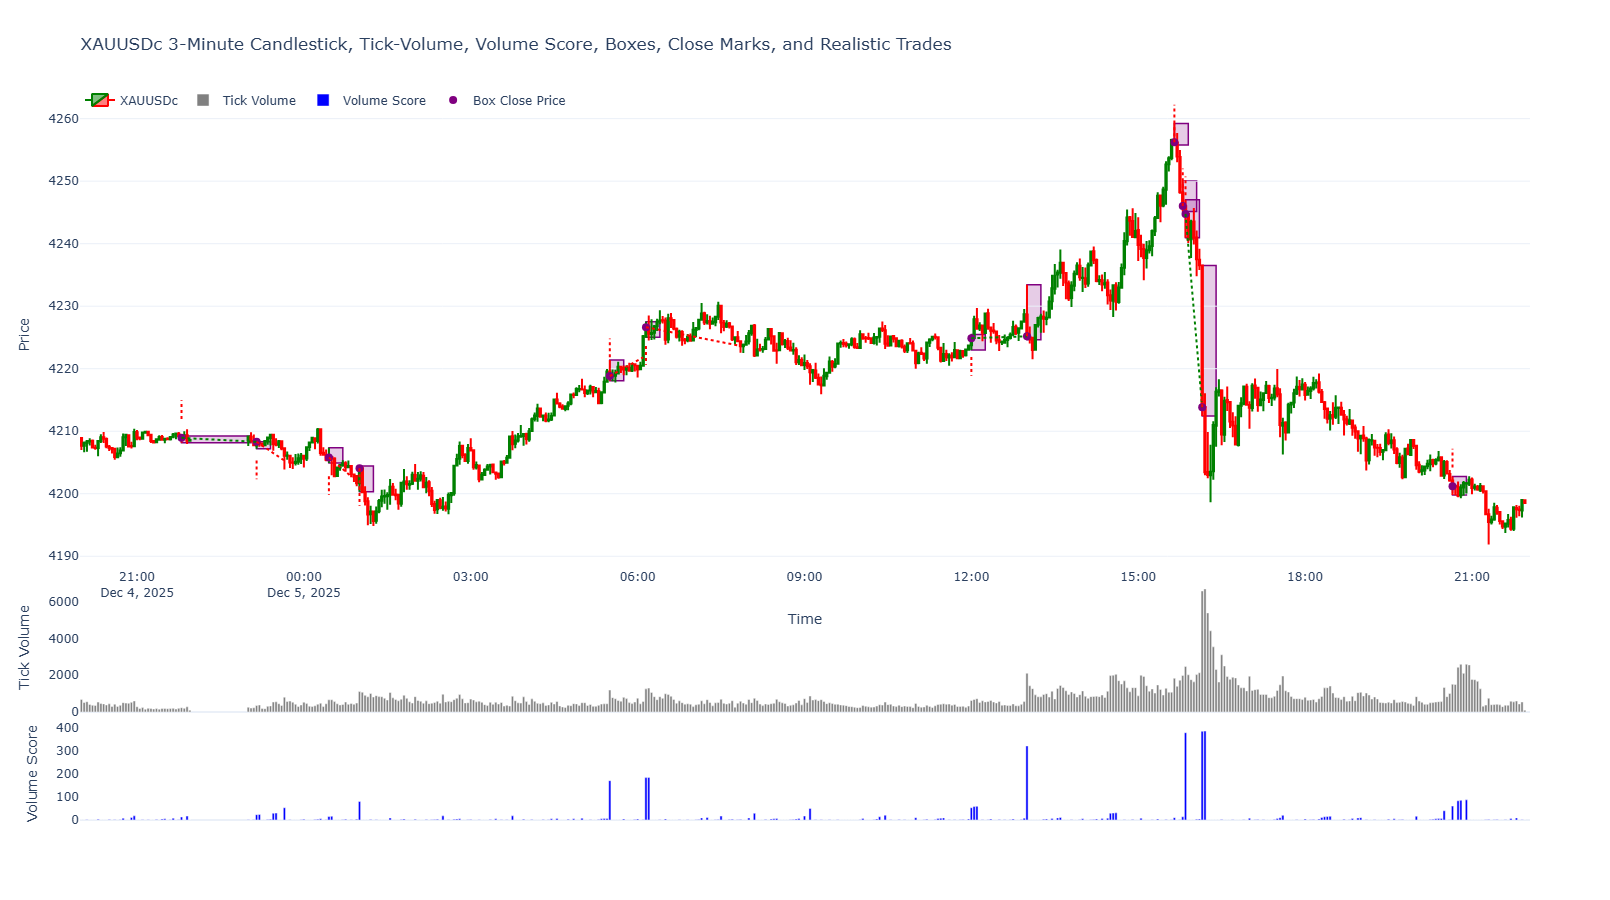

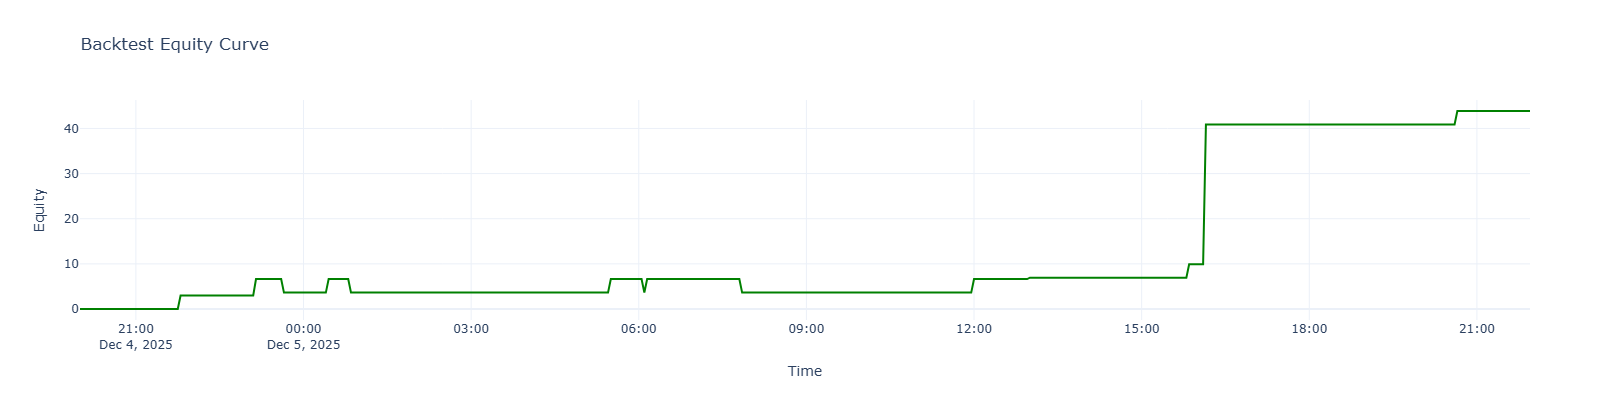

In [19]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[df.index.dayofweek < 5]  # remove weekends

# -------------------------
# 4. Infinite tick-volume score
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 5. Box logic for 10x vol_score spikes
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 6. Backtest realistic trade execution
# -------------------------
price_unit = 3
equity = []
balance = 0
trade_lines = []

active_trades = []

for i in range(len(df)):
    # Check for new signal
    if df.index[i] in box_marks_x:
        close_price = df['close'].iloc[i]
        is_bullish = close_price > df['open'].iloc[i]

        # Close all previous trades at next signal (take profit = signal close)
        for t in active_trades:
            if t['status'] == 'open':
                pnl = 0
                exit_price = close_price
                if t['type'] == 'buy':
                    pnl = exit_price - t['entry']
                    trade_lines.append(dict(
                        type="line",
                        xref="x",
                        yref="y",
                        x0=df.index[t['index']],
                        x1=df.index[i],
                        y0=t['entry'],
                        y1=exit_price,
                        line=dict(color='green', width=2, dash='dot'),
                        layer="above"
                    ))
                elif t['type'] == 'sell':
                    pnl = t['entry'] - exit_price
                    trade_lines.append(dict(
                        type="line",
                        xref="x",
                        yref="y",
                        x0=df.index[t['index']],
                        x1=df.index[i],
                        y0=t['entry'],
                        y1=exit_price,
                        line=dict(color='green', width=2, dash='dot'),
                        layer="above"
                    ))
                balance += pnl
                t['status'] = 'closed'

        active_trades = []

        # Place pending orders per signal
        if is_bullish:
            active_trades.append({'type':'buy','entry':close_price,'stop':close_price-price_unit,'index':i,'status':'open'})
            active_trades.append({'type':'sell','entry':close_price-price_unit,'stop':close_price-2*price_unit,'index':i,'status':'open'})
        else:
            active_trades.append({'type':'sell','entry':close_price,'stop':close_price+price_unit,'index':i,'status':'open'})
            active_trades.append({'type':'buy','entry':close_price+price_unit,'stop':close_price+2*price_unit,'index':i,'status':'open'})

    # Update equity & check stoploss execution
    for t in active_trades:
        if t['status'] == 'open':
            if t['type'] == 'buy':
                # Stoploss hit
                if df['low'].iloc[i] <= t['stop']:
                    pnl = t['stop'] - t['entry']
                    balance += pnl
                    trade_lines.append(dict(
                        type="line",
                        xref="x",
                        yref="y",
                        x0=df.index[t['index']],
                        x1=df.index[i],
                        y0=t['entry'],
                        y1=t['stop'],
                        line=dict(color='red', width=2, dash='dot'),
                        layer="above"
                    ))
                    t['status'] = 'closed'
            elif t['type'] == 'sell':
                if df['high'].iloc[i] >= t['stop']:
                    pnl = t['entry'] - t['stop']
                    balance += pnl
                    trade_lines.append(dict(
                        type="line",
                        xref="x",
                        yref="y",
                        x0=df.index[t['index']],
                        x1=df.index[i],
                        y0=t['entry'],
                        y1=t['stop'],
                        line=dict(color='red', width=2, dash='dot'),
                        layer="above"
                    ))
                    t['status'] = 'closed'

    equity.append(balance)

df['equity'] = equity

# -------------------------
# 7. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes + trade lines
fig.update_layout(shapes=boxes + trade_lines)

# Add marks at box closing price
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Volume Score, Boxes, Close Marks, and Realistic Trades',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()

# -------------------------
# 8. Equity curve
# -------------------------
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df.index,
    y=df['equity'],
    mode='lines',
    name='Equity Curve',
    line=dict(color='green', width=2)
))
fig2.update_layout(
    template='plotly_white',
    title='Backtest Equity Curve',
    xaxis_title='Time',
    yaxis_title='Equity',
    height=400
)
fig2.show()


Trading Logic
Define hedge signal as (‘Box Close Price’ mark = true)

If there's a hedge signal at the bullish candlestick, then place a buy-market order at the close price (this will count as an ‘entry’ variable) at the corresponding candlestick. And sell-stop at ‘close price - 3 price units’ price, if this is revisited by the proceeding developing prices then count it as an ‘entry’ variable. Use 3 price units as stoploss distance for both buy-market and sell-stop type order—if this is visited, then count it as an ‘exit’ variable. The take profit distance varies until the next hedge signal. The unfilled/untriggered orders are only valid until the next signal. Both buy side and sell side entries may trigger and are only valid until the next signal.

If there's a hedge signal at the bearish candlestick, then place a sell-market order at the close price (this will count as an ‘entry’ variable) at the corresponding candlestick. And buy-stop at ‘close price + 3 price units’ price, if this is revisited by the proceeding developing prices then count it as an ‘entry’ variable. Use 3 price units as stoploss distance for both sell-market and buy-stop type order—if this is visited, then count it as an ‘exit’ variable. The take profit distance varies until the next hedge signal. The unfilled/untriggered orders are only valid until the next signal. Both buy side and sell side entries may trigger and are only valid until the next signal.


Mark the entries and exits at the time & price it got filled/triggered. Use green colored breakline from entry to take profit (exit), and red colored breakline from entry to stoploss (exit). 


C:\Users\User\AppData\Local\Temp\ipykernel_10844\3939489237.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



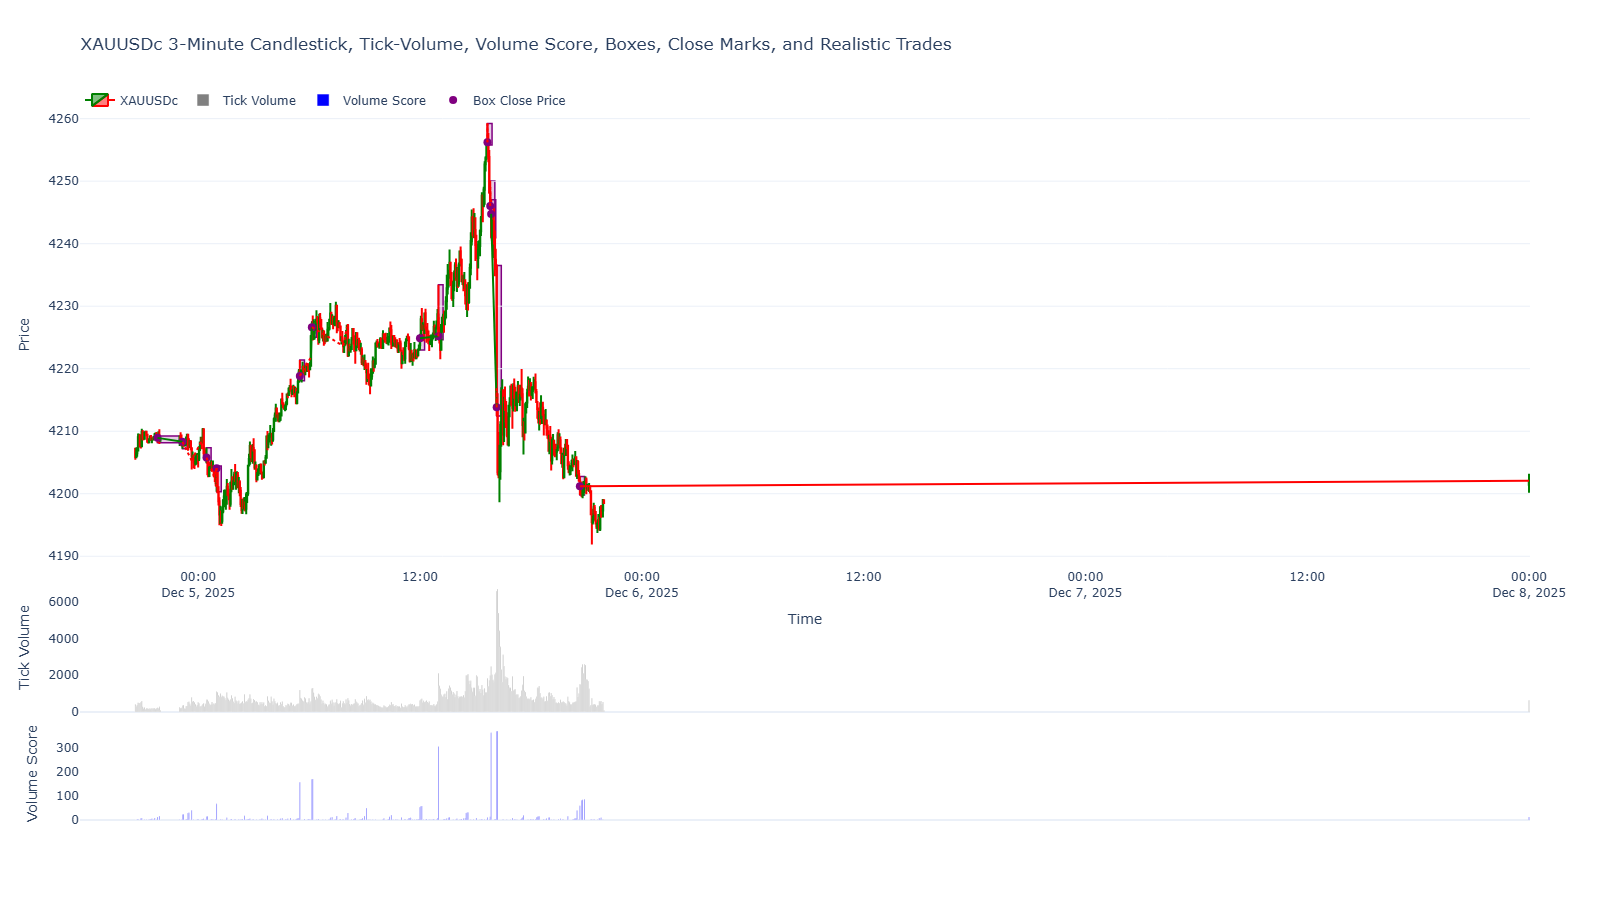

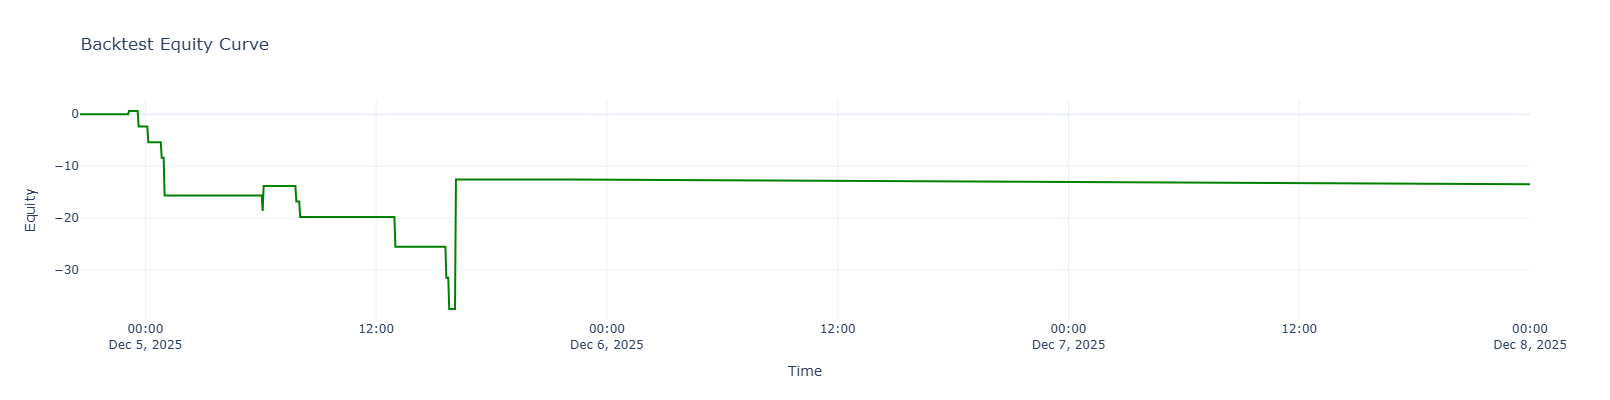

In [2]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()

# -------------------------
# 2. Fetch 3-minute data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
n_bars = 500
utc_from = datetime.now() - timedelta(days=2)

rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n_bars)
mt5.shutdown()

# -------------------------
# 3. Convert to DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[df.index.dayofweek < 5]  # remove weekends

# -------------------------
# 4. Infinite tick-volume score
# -------------------------
def tick_volume_infinite_score(volumes):
    scores = np.zeros(len(volumes))
    for i in range(1, len(volumes)):
        count = 0
        for j in range(i-1, -1, -1):
            if volumes[i] > volumes[j]:
                count += 1
            else:
                break
        scores[i] = count
    return scores

df['vol_score'] = tick_volume_infinite_score(df['tick_volume'])

# -------------------------
# 5. Box logic for 10x vol_score spikes
# -------------------------
boxes = []
box_marks_x = []
box_marks_y = []

for i in range(1, len(df)):
    if df['vol_score'].iloc[i-1] > 0 and df['vol_score'].iloc[i] >= 10 * df['vol_score'].iloc[i-1]:
        x0 = df.index[i]
        x1 = df.index[min(i+5, len(df)-1)]  # extend 5 bars to the right
        y0 = df['low'].iloc[i]
        y1 = df['high'].iloc[i]
        boxes.append(dict(
            type="rect",
            xref="x",
            yref="y",
            x0=x0,
            x1=x1,
            y0=y0,
            y1=y1,
            line=dict(color="purple", width=1.5),
            fillcolor="rgba(128,0,128,0.2)",
            layer="below"
        ))
        box_marks_x.append(df.index[i])
        box_marks_y.append(df['close'].iloc[i])

# -------------------------
# 6. Realistic backtest for strategy (REPLACED WITH USER LOGIC)
# -------------------------
price_unit = 3  # 3 price units (as requested)
balance = 0.0
equity = []
trade_lines = []

# Structures:
# open_trades: list of dicts for currently open trades (filled market or triggered stop orders)
#   each trade: {'type':'buy'/'sell', 'entry':float, 'stop':float, 'entry_idx':int, 'open':True}
# pending_orders: pending stop-entry orders valid until next signal
#   each pending: {'type':'buy_stop'/'sell_stop', 'entry':float, 'parent_signal_idx':int}
open_trades = []
pending_orders = []

# Counters (optional, but helpful)
entry_count = 0
exit_count = 0

# Map from timestamp to signal index for faster lookup
signal_index_map = {ts: idx for idx, ts in enumerate(box_marks_x)}

# Helper: close all open trades at given time index and exit_price (used when next signal occurs)
def close_all_trades_at_signal(i, exit_price, exit_time_index):
    global balance, exit_count
    closed_lines = []
    for t in open_trades[:]:
        if not t.get('open', False):
            continue
        # PnL calculation depending on type
        pnl = 0.0
        if t['type'] == 'buy':
            pnl = exit_price - t['entry']
        elif t['type'] == 'sell':
            pnl = t['entry'] - exit_price
        balance += pnl
        exit_count += 1

        # choose color: green if profit > 0 else red
        color = 'green' if pnl > 0 else 'red'

        closed_lines.append(dict(
            type="line",
            xref="x",
            yref="y",
            x0=df.index[t['entry_idx']],
            x1=df.index[exit_time_index],
            y0=t['entry'],
            y1=exit_price,
            line=dict(color=color, width=2),
            layer="above"
        ))
        # mark trade closed
        t['open'] = False
        # remove from open_trades
        open_trades.remove(t)
    return closed_lines

# Main loop: iterate bars
for i in range(len(df)):
    current_time = df.index[i]
    current_open = df['open'].iloc[i]
    current_high = df['high'].iloc[i]
    current_low = df['low'].iloc[i]
    current_close = df['close'].iloc[i]

    # 1) If this bar is a hedge signal (Box Close Price mark)
    if current_time in signal_index_map:
        # On signal: first, close/exit all open trades at this signal close price (per spec)
        closed_lines = close_all_trades_at_signal(i, current_close, i)
        trade_lines.extend(closed_lines)

        # Pending/unfilled orders are invalidated at the new signal (per spec)
        pending_orders = []

        # Determine signal direction (bullish if close > open on that bar)
        is_bullish = current_close > current_open

        # Place orders per logic
        if is_bullish:
            # 1) Immediate buy-market at close (entry recorded)
            buy_trade = {
                'type': 'buy',
                'entry': current_close,
                'stop': current_close - price_unit,
                'entry_idx': i,
                'open': True
            }
            open_trades.append(buy_trade)
            entry_count += 1

            # 2) Place pending sell-stop at close - price_unit (if revisited, it becomes an entry)
            pending_orders.append({
                'type': 'sell_stop',
                'entry': current_close - price_unit,
                'parent_signal_idx': i
            })
        else:
            # Bearish signal
            # 1) Immediate sell-market at close
            sell_trade = {
                'type': 'sell',
                'entry': current_close,
                'stop': current_close + price_unit,
                'entry_idx': i,
                'open': True
            }
            open_trades.append(sell_trade)
            entry_count += 1

            # 2) Place pending buy-stop at close + price_unit
            pending_orders.append({
                'type': 'buy_stop',
                'entry': current_close + price_unit,
                'parent_signal_idx': i
            })

    # 2) Check pending orders to see if they trigger on this bar
    #    If triggered, they become open trades (entries), valid until next signal
    for po in pending_orders[:]:
        if po['type'] == 'sell_stop':
            # triggers when low <= entry
            if current_low <= po['entry']:
                # Trigger short entry at po['entry'] (stop-order triggered)
                triggered_entry_price = po['entry']
                new_trade = {
                    'type': 'sell',
                    'entry': triggered_entry_price,
                    'stop': triggered_entry_price + price_unit,  # stoploss distance 3 price units above entry
                    'entry_idx': i,
                    'open': True
                }
                open_trades.append(new_trade)
                entry_count += 1
                # remove pending order after it triggers
                pending_orders.remove(po)
        elif po['type'] == 'buy_stop':
            # triggers when high >= entry
            if current_high >= po['entry']:
                # Trigger long entry at po['entry']
                triggered_entry_price = po['entry']
                new_trade = {
                    'type': 'buy',
                    'entry': triggered_entry_price,
                    'stop': triggered_entry_price - price_unit,  # stoploss distance 3 price units below entry
                    'entry_idx': i,
                    'open': True
                }
                open_trades.append(new_trade)
                entry_count += 1
                pending_orders.remove(po)

    # 3) Check open trades for stoploss hits on this bar
    #    If stoploss hit, exit at the stop price and record red line
    for t in open_trades[:]:
        if not t.get('open', False):
            continue

        if t['type'] == 'buy':
            # stoploss triggers if low <= stop
            if current_low <= t['stop']:
                exit_price = t['stop']
                pnl = exit_price - t['entry']
                balance += pnl
                exit_count += 1

                # red line for stoploss (explicitly requested)
                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[t['entry_idx']],
                    x1=df.index[i],
                    y0=t['entry'],
                    y1=exit_price,
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                t['open'] = False
                open_trades.remove(t)

        elif t['type'] == 'sell':
            # stoploss triggers if high >= stop
            if current_high >= t['stop']:
                exit_price = t['stop']
                pnl = t['entry'] - exit_price
                balance += pnl
                exit_count += 1

                trade_lines.append(dict(
                    type="line",
                    xref="x",
                    yref="y",
                    x0=df.index[t['entry_idx']],
                    x1=df.index[i],
                    y0=t['entry'],
                    y1=exit_price,
                    line=dict(color='red', width=2, dash='dot'),
                    layer="above"
                ))
                t['open'] = False
                open_trades.remove(t)

    # 4) Record equity (running PnL). Equity is cumulative realized PnL (balance).
    equity.append(balance)

# After loop, if any open trades remain (no further signals to close them), close them at the last available close price
if open_trades:
    final_close = df['close'].iloc[-1]
    final_idx = len(df) - 1
    for t in open_trades[:]:
        if not t.get('open', False):
            continue
        if t['type'] == 'buy':
            pnl = final_close - t['entry']
        else:
            pnl = t['entry'] - final_close
        balance += pnl
        # color green if profit else red
        color = 'green' if pnl > 0 else 'red'
        trade_lines.append(dict(
            type="line",
            xref="x",
            yref="y",
            x0=df.index[t['entry_idx']],
            x1=df.index[final_idx],
            y0=t['entry'],
            y1=final_close,
            line=dict(color=color, width=2),
            layer="above"
        ))
        t['open'] = False
        open_trades.remove(t)
    equity[-1] = balance

df['equity'] = equity

# -------------------------
# 7. Plot 3-pane chart
# -------------------------
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# Tick-volume bars
fig.add_trace(go.Bar(
    x=df.index,
    y=df['tick_volume'],
    name='Tick Volume',
    marker_color='gray',
    yaxis='y2'
))

# Volume score bars
fig.add_trace(go.Bar(
    x=df.index,
    y=df['vol_score'],
    name='Volume Score',
    marker_color='blue',
    yaxis='y3'
))

# Add boxes + trade lines
fig.update_layout(shapes=boxes + trade_lines)

# Add marks at box closing price
fig.add_trace(go.Scatter(
    x=box_marks_x,
    y=box_marks_y,
    mode='markers',
    marker=dict(color='purple', size=8, symbol='circle'),
    name='Box Close Price',
    yaxis='y'
))

# Layout
fig.update_layout(
    template='plotly_white',
    title='XAUUSDc 3-Minute Candlestick, Tick-Volume, Volume Score, Boxes, Close Marks, and Realistic Trades',
    xaxis=dict(title='Time', rangeslider=dict(visible=False)),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    yaxis2=dict(title='Tick Volume', domain=[0.15, 0.33], showgrid=False),
    yaxis3=dict(title='Volume Score', domain=[0, 0.13], showgrid=False),
    legend=dict(orientation='h', y=1.02, x=0),
    height=900
)

fig.show()

# -------------------------
# 8. Plot Equity Curve
# -------------------------
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df.index,
    y=df['equity'],
    mode='lines',
    name='Equity Curve',
    line=dict(color='green', width=2)
))
fig2.update_layout(
    template='plotly_white',
    title='Backtest Equity Curve',
    xaxis_title='Time',
    yaxis_title='Equity',
    height=400
)
fig2.show()
